In [1]:
!pip install librosa

In [0]:
def image_analyser():

    import cv2 
    import glob
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image

    #Crio as listas que guardarão as imgs
    X_treino = []
    X_teste = []
    
    #Itero sobre os arquivos de img já separando-os em treino e teste
    aux = 0
    while aux<=49:
      ### recupera as dimensões (em pixel) do chromograma
      img = cv2.imread("lily_treino%s.png" % aux)
      img2= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      img3 = cv2.resize(img2, (1000, 325))

      width = img3.shape[1]
      height = img3.shape[0]
      ## coordenada inicial, para os recortes
      stage = 0
      indice = 0
      ## espessura da faixa a ser extraída
      ## necessita analisar, utilizando o tempo da musica
      step = 10

      ###
      ### While que varre a foto, recortando faixas e criando imagens 
      while stage+step <= width:
          img_cut=img3[0:height, stage:stage+step,].copy()
          X_treino.append(img_cut)

          ### Varre a foto de step em step
          stage += step
          indice += 1
      
      aux += 1

    aux = 0
    while aux<=14:
      ### recupera as dimensões (em pixel) do chromograma
      img = cv2.imread("lily_teste%s.png" % aux)
      img2= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      img3 = cv2.resize(img2, (1000, 325))

      width = img3.shape[1]
      height = img3.shape[0]
      ## coordenada inicial, para os recortes
      stage = 0
      indice = 0
      ## espessura da faixa a ser extraída
      ## necessita analisar, utilizando o tempo da musica
      step = 10

      ###
      ### While que varre a foto, recortando faixas e criando imagens 
      while stage+step <= width:
          img_cut=img3[0:height, stage:stage+step,].copy()
          X_teste.append(img_cut)

          ### Varre a foto de step em step
          stage += step
          indice += 1
      
      aux += 1
    

    X_treino = np.array(X_treino)
    X_teste = np.array(X_teste)

    # a = X_treino.shape[0]
    # b = X_teste.shape[0]

    # X_treino.reshape(75, 369, 5, 1)
    # X_teste.reshape(24, 369, 5, 1)

    print('X_treino shape:', X_treino.shape)
    print('X_teste shape:', X_teste.shape)

    return [X_treino,X_teste]

# auxiliar = image_analyser()

# print(len(auxiliar[0]))

In [0]:
def convnet(X_train, y_train, X_test, y_test, width, height):
    """**Import das bibliotecas utilizadas**
    """
    # Commented out IPython magic to ensure Python compatibility.
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import tensorflow as tf
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import Conv2D
    from keras.layers import MaxPooling2D
    from keras.layers import Flatten
    from keras.optimizers import SGD
    from keras.utils import to_categorical
    # %matplotlib inline

    """**Adaptando os dados do dataset**"""

    """Neste bloco o código transforma as imagens de treino e teste de modo que haja apenas um canal de cor em cada bit, já que as imagens são em escala de cinza.
    Aqui também foram normalizados os valores dos pixels de cada imagem, para que fiquem entre 0 e 1."""

    # #Reshape do dataset de modo que tenha apenas um canal de cor
    X_train = X_train.reshape(X_train.shape[0], height, width, 1)
    X_test = X_test.reshape(X_test.shape[0], height, width, 1)
    input_shape = (height, width, 1)

    #Transformando os ints em vetores de tamanho 12
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)


    """**Criação do modelo de NN e compilação**"""

    """Foi definido o tipo de modelo e as camadas, sendo 5:
    - Uma de convolução, a qual aplica filtros na imagem (neste caso foram 32), para que algumas características da imagem se tornem mais claras.
    - Uma de MaxPooling, que diminui o tamanho da imagem mantendo suas características principais, essa camada faz isso escolhendo o maior valor em uma janela (neste caso 2x2) e transfererindo para o próximo layer.
    - Uma camada Flatten que cria um vetor único, a partir de vetores de outras camadas.
    - Duas camadas Dense, camada em que todos os neurônios de cada camada são ligados na próxima.
    Na hora de compilar o modelo está sendo usada uma learning rate de 0.01.
    """

    #Define o modelo e suas camadas
    model = Sequential()
    model.add(Conv2D(8, (10, 3), activation='relu',kernel_initializer='he_uniform', input_shape = input_shape))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(2, (10, 3), activation='relu',kernel_initializer='he_uniform', input_shape = input_shape))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten()) 
    model.add(Dense(350, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(140, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(35, activation='softmax'))

    #compilando o modelo
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    #Fit do modelo
    history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2, verbose=2)

    #Validação do modelo
    model.evaluate(X_test, y_test, verbose = 2)

    print(history.history.keys())
    plt.close()
    #gráfico de loss e acurácia
    # plt.subplot(2,1,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title("Acurácia do modelo")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['train','test'], loc='lower right')
    plt.show()
    #plt.savefig("images\\acuracia_convnet.png")
    #plt.close()

    # plt.subplot(2,1,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Loss do Modelo")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['train','test'], loc='upper right')

    plt.show()

    return model

    #plt.savefig("images\\loss_convnet.png")
    #plt.close()
    # print('Evaluated Loss', score[0])
    # print('Evaluated Accuracy', score[1])

Inicio do teste:
X_treino shape: (5000, 325, 10)
X_teste shape: (1500, 325, 10)
      note_num
0         32.0
1         29.0
2          1.0
3         19.0
4          3.0
...        ...
4995       7.0
4996      30.0
4997      15.0
4998       1.0
4999       1.0

[5000 rows x 1 columns]
      note_num
0         26.0
1          1.0
2         31.0
3         22.0
4         17.0
...        ...
1495      15.0
1496      26.0
1497       4.0
1498       9.0
1499      15.0

[1500 rows x 1 columns]
entrando na convnet
Train on 4000 samples, validate on 1000 samples
Epoch 1/10
 - 9s - loss: 3.7038 - acc: 0.0420 - val_loss: 3.5533 - val_acc: 0.0510
Epoch 2/10
 - 8s - loss: 3.5465 - acc: 0.0582 - val_loss: 3.5417 - val_acc: 0.0580
Epoch 3/10
 - 8s - loss: 3.5060 - acc: 0.0718 - val_loss: 3.4293 - val_acc: 0.0710
Epoch 4/10
 - 8s - loss: 2.2050 - acc: 0.3803 - val_loss: 0.3905 - val_acc: 0.8970
Epoch 5/10
 - 8s - loss: 0.3480 - acc: 0.8992 - val_loss: 0.1988 - val_acc: 0.9100
Epoch 6/10
 - 8s - loss: 0.

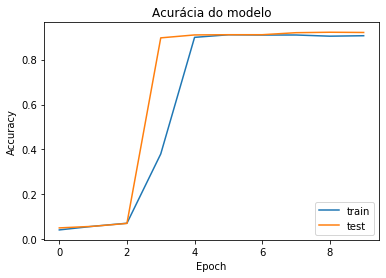

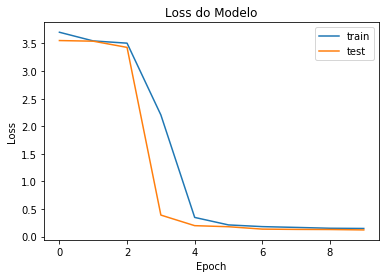

Tamanho do X_treino:  5000
Tamanho do X_teste:  1500
Fim do teste


In [23]:
import pandas as pd

print("Inicio do teste:")

[X_treino, X_teste] = image_analyser()
df_treino = pd.read_csv("df_treino.csv", sep=';', usecols=[1])
df_teste = pd.read_csv("df_teste.csv", sep=';', usecols=[1])
y_treino, y_teste = df_treino[0:5000], df_teste[0:1500]
print(y_treino)
print(y_teste)

print("entrando na convnet")
model = convnet(X_treino, y_treino, X_teste, y_teste, 10, 325)

print("Tamanho do X_treino: ",len(X_treino))
print("Tamanho do X_teste: ",len(X_teste))
print("Fim do teste")

In [0]:
def preditor_prep():
    import numpy as np
    import matplotlib.pyplot as plt
    import librosa
    from librosa import cqt
    from librosa.display import specshow
    import os
    import cv2

    # leitura da música
    y, sr = librosa.load("lilium.wav")
    # execução da transformada
    chroma = cqt(y)
    logcqt = librosa.amplitude_to_db(np.abs(chroma))

    # Definição de frequência mínima e máxima de acordo com a amplitude do piano
    fmin = librosa.note_to_hz('A0', round_midi=True)
    fmax = librosa.note_to_hz('C8', round_midi=True)

    # criação da imagem base - chromograma completo
    plt.axis('off')
    plt.margins(0)
    specshow(chroma, fmin=fmin, fmax=fmax, cmap='gray')

    # Salva o chromograma com o nome padrão
    plt.savefig("lilium.png", bbox_inches='tight', pad_inches=0)
    
    ### recupera as dimensões (em pixel) do chromograma
    img = cv2.imread("lilium.png")
    img2= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img3 = cv2.resize(img2, (1000, 325))

    width = img3.shape[1]
    height = img3.shape[0]
    ## coordenada inicial, para os recortes
    stage = 0
    indice = 0
    ## espessura da faixa a ser extraída
    ## necessita analisar, utilizando o tempo da musica
    step = 10

    ###
    ### While que varre a foto, recortando faixas e criando imagens 
    X = []
    while stage+step <= width:
        img_cut=img3[0:height, stage:stage+step,].copy()
        X.append(img_cut)

        ### Varre a foto de step em step
        stage += step
        indice += 1
    
    X = np.array(X)
    X = X.reshape(X.shape[0], height, 10, 1)

    return X

In [0]:
def cria_csv_predito(array):
  import numpy as np
  import pandas as pd


  array_lily = np.array([],dtype = object)

  for i in range(len(array)):
      if array[i] == 0 :
          array_lily = np.append(array_lily, "c'")
          
      elif array[i] == 1:
          array_lily = np.append(array_lily, "cis'")

      elif array[i] == 2:
          array_lily = np.append(array_lily, "d'")

      elif array[i] == 3:
          array_lily = np.append(array_lily, "dis'")

      elif array[i] == 4:
          array_lily = np.append(array_lily, "e'")

      elif array[i] == 5:
          array_lily = np.append(array_lily, "f'")

      elif array[i] == 6:
          array_lily = np.append(array_lily,  "fis'")

      elif array[i] == 7:
          array_lily = np.append(array_lily,  "g'")

      elif array[i] == 8:
          array_lily = np.append(array_lily,  "gis'")

      elif array[i] == 9:
          array_lily = np.append(array_lily,  "a'")

      elif array[i] == 10:
          array_lily = np.append(array_lily,  "ais'")

      elif array[i] == 11:
          array_lily = np.append(array_lily,  "b'")

      elif array[i] == 12:
          array_lily = np.append(array_lily,  "c''")
          
      elif array[i] == 13:
          array_lily = np.append(array_lily,  "cis''")

      elif array[i] == 14:
          array_lily = np.append(array_lily,  "d''")

      elif array[i] == 15:
          array_lily = np.append(array_lily,  "dis''")

      elif array[i] == 16:
          array_lily = np.append(array_lily,  "e''")

      elif array[i] == 17:
          array_lily = np.append(array_lily,  "f''")

      elif array[i] == 18:
          array_lily = np.append(array_lily,  "fis''")

      elif array[i] == 19:
          array_lily = np.append(array_lily,  "g''")

      elif array[i] == 20:
          array_lily = np.append(array_lily,  "gis''")

      elif array[i] == 21:
          array_lily = np.append(array_lily,  "a''")

      elif array[i] == 22:
          array_lily = np.append(array_lily,  "ais''")

      elif array[i] == 23:
          array_lily = np.append(array_lily,  "b''")

      elif array[i] == 24:
          array_lily = np.append(array_lily,  "c'''")
          
      elif array[i] == 25:
          array_lily = np.append(array_lily,  "cis'''")

      elif array[i] == 26:
          array_lily = np.append(array_lily,  "d'''")

      elif array[i] == 27:
          array_lily = np.append(array_lily,  "dis'''")

      elif array[i] == 28:
          array_lily = np.append(array_lily,  "e'''")

      elif array[i] == 29:
          array_lily = np.append(array_lily,  "f'''")

      elif array[i] == 30:
          array_lily = np.append(array_lily,  "fis'''")

      elif array[i] == 31:
          array_lily = np.append(array_lily,  "g'''")

      elif array[i] == 32:
          array_lily = np.append(array_lily,  "gis'''")

      elif array[i] == 33:
          array_lily = np.append(array_lily,  "a'''")

      elif array[i] == 34:
          array_lily = np.append(array_lily,  "ais'''")

      elif array[i] == 35:
          array_lily = np.append(array_lily,  "b'''")

  data_pred = {"note_num": array, "note_name": array_lily}
  df_pred = pd.DataFrame(data_pred)
  df_pred.to_csv(path_or_buf = "df_pred.csv", sep=";")

In [0]:
def escreve_partitura():
    import numpy as np
    import pandas as pd

    df_pred = pd.read_csv(r"df_pred.csv", sep=';', usecols=['note_name'])

    ar_pred = np.array(df_pred)

    file_lily = open("lily_pred.ly", "w") 

    file_lily.write("\\version \"2.18.2\"\n")
    file_lily.write("\n\score {\n")
    file_lily.write("\n{\n")
    file_lily.write("\clef treble\n")
    for j in range(100):
        nota = str(ar_pred[j])
        nota = nota.strip("[]\"")
        file_lily.write(nota + " ")

    file_lily.write("\n}\n")
    file_lily.write("\n \midi { }")
    file_lily.write("\n \layout { }")
    file_lily.write("\n}")
    file_lily.close  

/usr/local/lib/python3.6/dist-packages/librosa/display.py:696: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


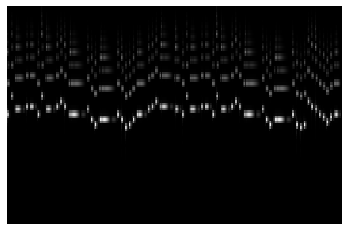

In [41]:
import numpy as np

y = model.predict(preditor_prep())
y_classe = np.array([])
for i in range(len(y)):
  y_classe = np.append(y_classe, np.argmax(y[i]))

cria_csv_predito(y_classe)
escreve_partitura()